<a href="https://colab.research.google.com/github/MasrukHabib/Phishing-website-detection-using-machine-learning/blob/main/web_phishing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/phishing.csv')

In [ ]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [ ]:
df.isnull().sum()

,0
Index,0
UsingIP,0
LongURL,0
ShortURL,0
Symbol@,0
Redirecting//,0
PrefixSuffix-,0
SubDomains,0
HTTPS,0
DomainRegLen,0


In [ ]:
target_counts = df['class'].value_counts()
print(target_counts)

# Check if the dataset is balanced
is_balanced = target_counts[-1] == target_counts[1]
print("Is the dataset balanced? ", is_balanced)


class
 1    6157
-1    4897
Name: count, dtype: int64
Is the dataset balanced?  False


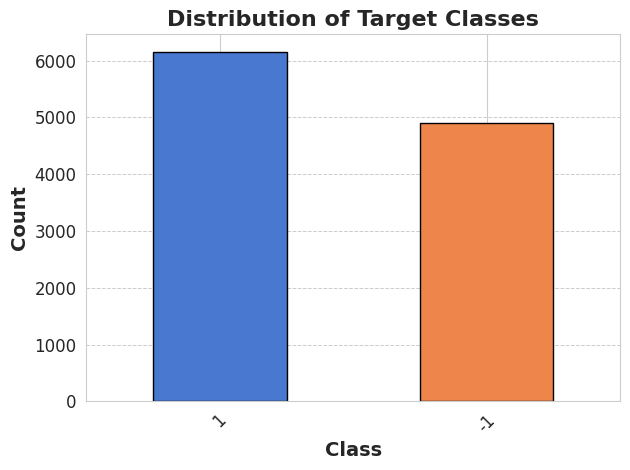

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set a color palette
palette = sns.color_palette("muted")

# Create the bar plot
target_counts.plot(kind='bar', color=palette, edgecolor='black')

# Add labels and title with enhanced font properties
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Target Classes', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid to the y-axis for better readability
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

# Add a tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['class'] = y_resampled

# Check the balance of the new dataset
balanced_target_counts = balanced_df['class'].value_counts()
print(balanced_target_counts)


class
-1    6157
 1    6157
Name: count, dtype: int64


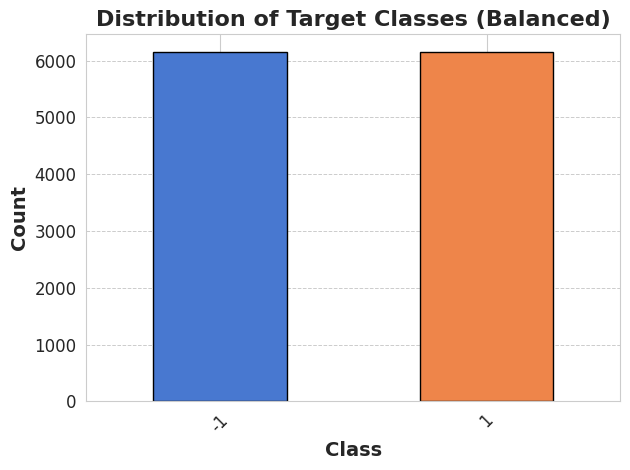

In [ ]:
# prompt: make a good vixulazitaion for databalanced

import matplotlib.pyplot as plt
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set a color palette
palette = sns.color_palette("muted")

# Create the bar plot for the balanced dataset
balanced_target_counts.plot(kind='bar', color=palette, edgecolor='black')

# Add labels and title with enhanced font properties
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Target Classes (Balanced)', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid to the y-axis for better readability
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

# Add a tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


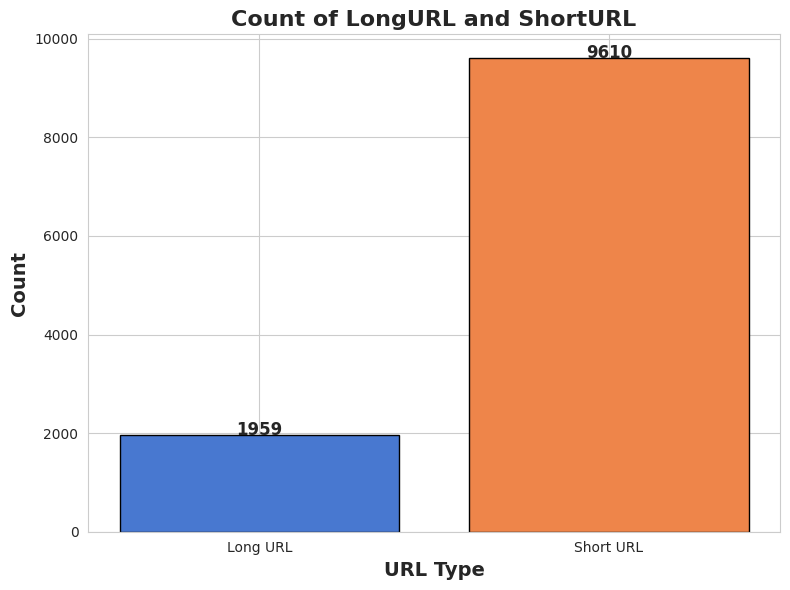

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example counts for LongURL and ShortURL
long_url_count = df['LongURL'].value_counts()[1]
short_url_count = df['ShortURL'].value_counts()[1]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar chart with a custom color palette
plt.figure(figsize=(8, 6))
colors = sns.color_palette("muted")

plt.bar(['Long URL', 'Short URL'], [long_url_count, short_url_count], color=colors[:2], edgecolor='black')

# Customize the title and labels
plt.xlabel('URL Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Count of LongURL and ShortURL', fontsize=16, fontweight='bold')

# Annotate the bars with the count values
for index, count in enumerate([long_url_count, short_url_count]):
    plt.text(index, count + 0.5, str(count), ha='center', fontsize=12, fontweight='bold')

# Add a tight layout to ensure nothing is cut off
plt.tight_layout()

# Display the plot
plt.show()


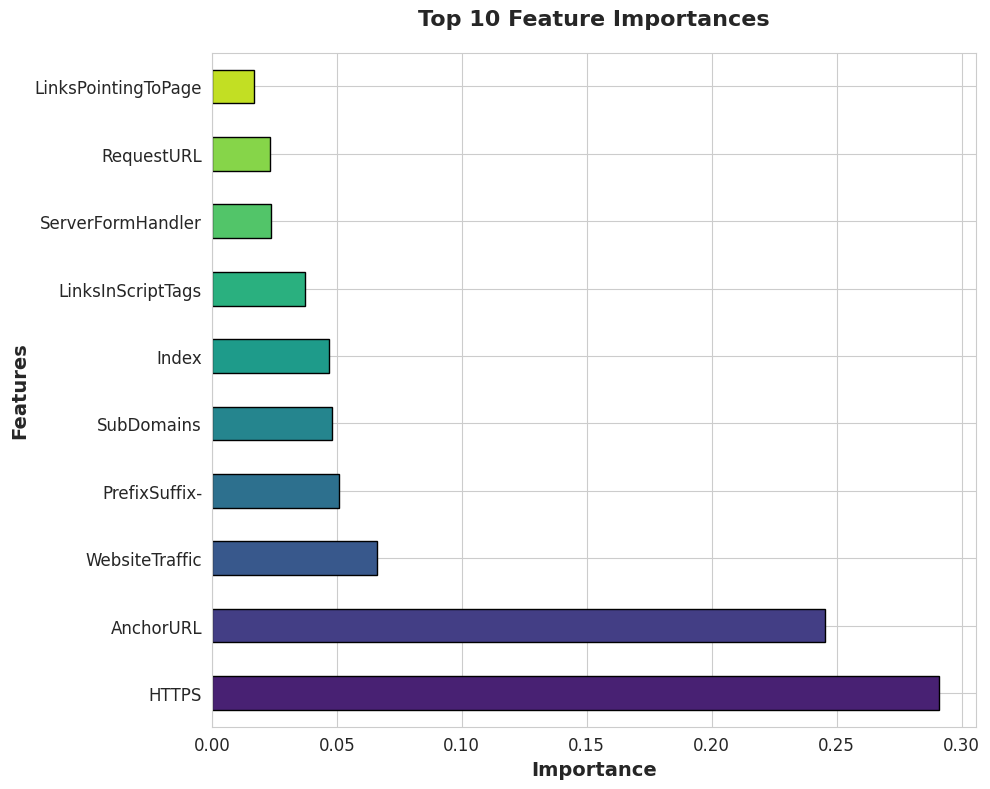

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

# Train the model
model = ExtraTreesClassifier()
model.fit(df.drop('class', axis=1), df['class'])

# Get feature importances
feat_importances = pd.Series(model.feature_importances_, index=df.drop('class', axis=1).columns)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the barh plot for the top 10 features
plt.figure(figsize=(10, 8))
feat_importances.nlargest(10).plot(kind='barh', color=sns.color_palette("viridis", 10), edgecolor='black')

# Customize the title and labels
plt.title('Top 10 Feature Importances', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a tight layout to ensure nothing is cut off
plt.tight_layout()

# Display the plot
plt.show()


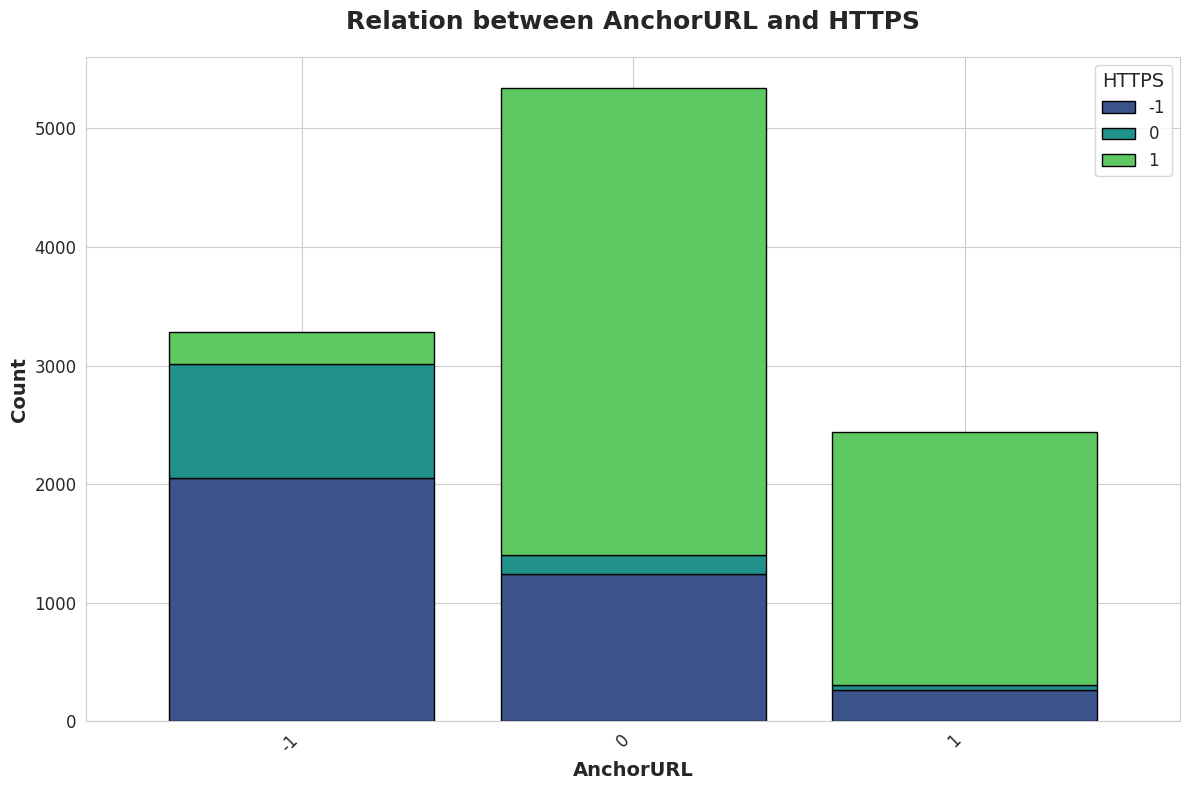

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'AnchorURL' and 'HTTPS', and count the occurrences
grouped_data = df.groupby(['AnchorURL', 'HTTPS'])['class'].count().unstack().fillna(0)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and axis object for better control
plt.figure(figsize=(12, 8))

# Plot the grouped data as a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, color=sns.color_palette("viridis", len(grouped_data.columns)), edgecolor='black', width=0.8, ax=plt.gca())

# Customize the title and labels
plt.title('Relation between AnchorURL and HTTPS', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('AnchorURL', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Customize the ticks
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='HTTPS', fontsize=12, title_fontsize=14)

# Add a tight layout to ensure nothing is cut off
plt.tight_layout()

# Display the plot
plt.show()


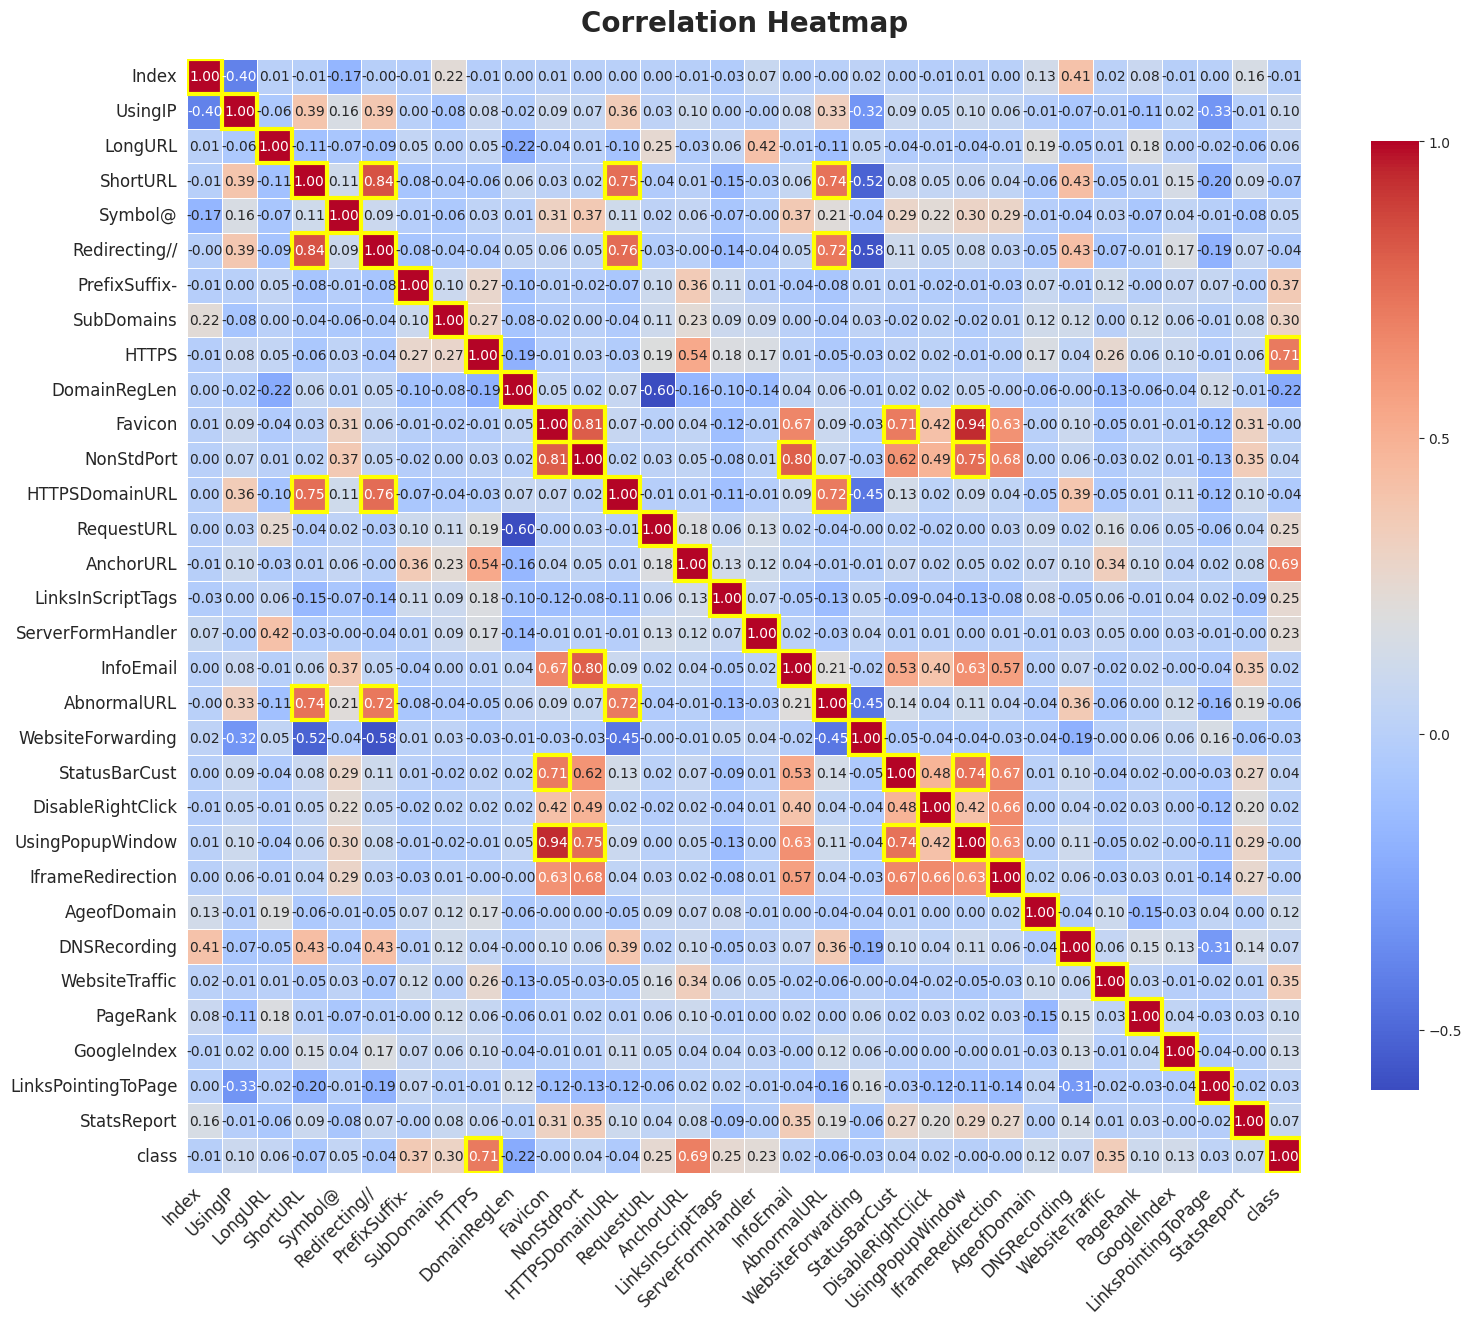

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = balanced_df.corr()

# Set the aesthetic style of the plots
sns.set_style("white")

# Create the heatmap with customization
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.75, "ticks": [-1, -0.5, 0, 0.5, 1]},  # Shrink and customize the color bar
    square=True  # Make the heatmap squares equal
)

# Customize title and labels
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

# Highlight the heatmap to distinguish high correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        if value > 0.7 or value < -0.7:  # High positive or negative correlation
            heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=3))

# Add a tight layout to ensure nothing is cut off
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    balanced_df.drop('class', axis=1), balanced_df['class'], test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (9851, 31) (9851,)
Testing set shape: (2463, 31) (2463,)


#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy of rf: {accuracy:.3f}")
# print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy of rf: 0.974

Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.97      0.97      1252
           1       0.97      0.98      0.97      1211

    accuracy                           0.97      2463
   macro avg       0.97      0.97      0.97      2463
weighted avg       0.97      0.97      0.97      2463



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Print classification report
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.953714981729598
              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1252
           1       0.95      0.96      0.95      1211

    accuracy                           0.95      2463
   macro avg       0.95      0.95      0.95      2463
weighted avg       0.95      0.95      0.95      2463



# SVM

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print classification report
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.4920828258221681
              precision    recall  f1-score   support

          -1       0.50      0.50      0.50      1252
           1       0.48      0.48      0.48      1211

    accuracy                           0.49      2463
   macro avg       0.49      0.49      0.49      2463
weighted avg       0.49      0.49      0.49      2463



# Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Print classification report
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8745432399512789
              precision    recall  f1-score   support

          -1       0.84      0.94      0.88      1252
           1       0.92      0.81      0.86      1211

    accuracy                           0.87      2463
   macro avg       0.88      0.87      0.87      2463
weighted avg       0.88      0.87      0.87      2463



#GBM


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm_classifier.predict(X_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Accuracy:", accuracy_gbm)

# Print classification report
print(classification_report(y_test, y_pred_gbm))


Gradient Boosting Accuracy: 0.9460008120178643
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      1252
           1       0.94      0.96      0.95      1211

    accuracy                           0.95      2463
   macro avg       0.95      0.95      0.95      2463
weighted avg       0.95      0.95      0.95      2463



#lightGBM

In [ ]:
import lightgbm as lgb

# Initialize LightGBM classifier
lgbm_classifier = lgb.LGBMClassifier(random_state=42)

# Train the model
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_classifier.predict(X_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy:", accuracy_lgbm)

# Print classification report
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 4946, number of negative: 4905
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 9851, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502081 -> initscore=0.008324
[LightGBM] [Info] Start training from score 0.008324
LightGBM Accuracy: 0.9687373122208689
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97      1252
           1       0.97      0.97      0.97      1211

    accuracy                           0.97      2463
   macro avg       0.97      0.97      0.97      2463
weighted avg       0.97      0.97      0.97      2463



#catboost


In [ ]:
!pip install catboost

from catboost import CatBoostClassifier

# Initialize CatBoost classifier
cb_classifier = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress training logs

# Train the model
cb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cb = cb_classifier.predict(X_test)

# Evaluate the model
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print("CatBoost Accuracy:", accuracy_cb)

# Print classification report
print(classification_report(y_test, y_pred_cb))


CatBoost Accuracy: 0.9703613479496549
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97      1252
           1       0.97      0.97      0.97      1211

    accuracy                           0.97      2463
   macro avg       0.97      0.97      0.97      2463
weighted avg       0.97      0.97      0.97      2463



#Model Accuracy Comparison

<ipython-input-102-71b4b4f1c187>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis', edgecolor='black')


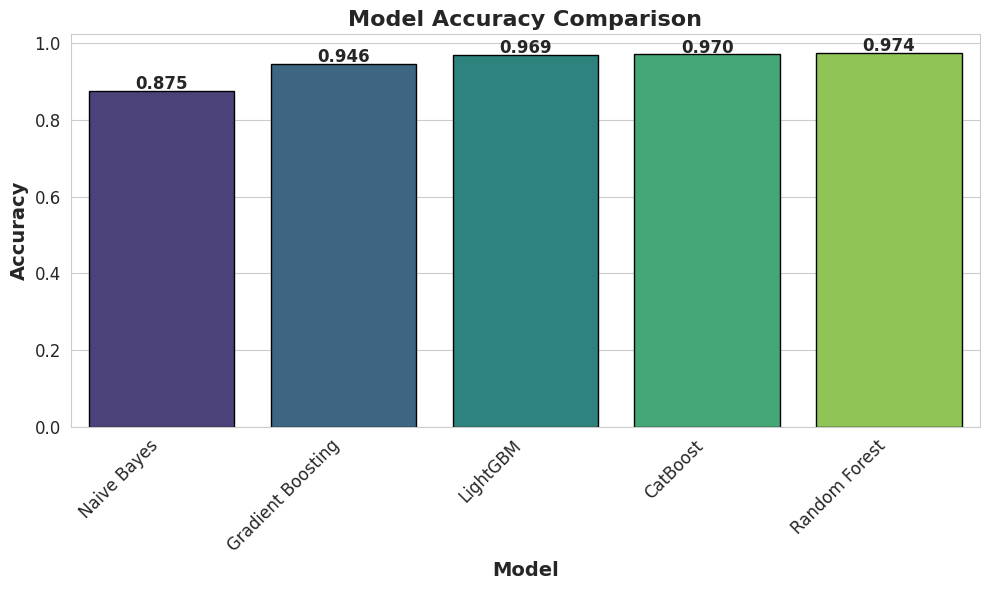

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary with model names and their corresponding accuracy
data = {
    'Model': ['CatBoost', 'LightGBM', 'Gradient Boosting', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [0.970361, 0.968737, 0.946001, 0.874543, 0.974]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(data)

# Sort the DataFrame by accuracy in ascending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=True)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis', edgecolor='black')

# Customize the title and labels
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)

# Add the accuracy values on top of the bars with three decimal places
for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(index, value + 0.005, f'{value:.3f}', ha='center', fontsize=12, fontweight='bold')

# Add a tight layout to ensure nothing is cut off
plt.tight_layout()

# Display the plot
plt.show()


#Hybrid Model Start

In [ ]:
# Initialize individual models
rf_classifier = RandomForestClassifier(random_state=42)
cb_classifier = CatBoostClassifier(random_state=42, verbose=0)
gbm_classifier = GradientBoostingClassifier(random_state=42)
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
nb_classifier = GaussianNB()

def evaluate_hybrid_model(y_true, y_pred, model_name):
  accuracy_hybrid = accuracy_score(y_true, y_pred)
  class_report_hybrid = classification_report(y_true, y_pred, output_dict=True)
  print(f"\n{model_name} Metrics:")
  print("Accuracy: {:.3f}".format(accuracy_hybrid))
  print("Recall (weighted avg): {:.3f}".format(class_report_hybrid['weighted avg']['recall']))
  print("F1-score (weighted avg): {:.3f}".format(class_report_hybrid['weighted avg']['f1-score']))


# 1. Random Forest + CatBoost
hybrid_model1 = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('catboost', cb_classifier)
], voting='soft')
hybrid_model1.fit(X_train, y_train)
y_pred_hybrid1 = hybrid_model1.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid1, "Random Forest + CatBoost")

# 2. Random Forest + Gradient Boosting
hybrid_model2 = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('gradientboost', gbm_classifier)
], voting='soft')
hybrid_model2.fit(X_train, y_train)
y_pred_hybrid2 = hybrid_model2.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid2, "Random Forest + Gradient Boosting")


# 3. Random Forest + LightGBM
hybrid_model3 = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('lightgbm', lgbm_classifier)
], voting='soft')
hybrid_model3.fit(X_train, y_train)
y_pred_hybrid3 = hybrid_model3.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid3, "Random Forest + LightGBM")

# 4. Random Forest + Naive Bayes
hybrid_model4 = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('naivebayes', nb_classifier)
], voting='soft')
hybrid_model4.fit(X_train, y_train)
y_pred_hybrid4 = hybrid_model4.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid4, "Random Forest + Naive Bayes")

# 5. CatBoost + Gradient Boosting
hybrid_model5 = VotingClassifier(estimators=[
    ('catboost', cb_classifier),
    ('gradientboost', gbm_classifier)
], voting='soft')
hybrid_model5.fit(X_train, y_train)
y_pred_hybrid5 = hybrid_model5.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid5, "CatBoost + Gradient Boosting")

# 6. CatBoost + LightGBM
hybrid_model6 = VotingClassifier(estimators=[
    ('catboost', cb_classifier),
    ('lightgbm', lgbm_classifier)
], voting='soft')
hybrid_model6.fit(X_train, y_train)
y_pred_hybrid6 = hybrid_model6.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid6, "CatBoost + LightGBM")

# 7. CatBoost + Naive Bayes
hybrid_model7 = VotingClassifier(estimators=[
    ('catboost', cb_classifier),
    ('naivebayes', nb_classifier)
], voting='soft')
hybrid_model7.fit(X_train, y_train)
y_pred_hybrid7 = hybrid_model7.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid7, "CatBoost + Naive Bayes")

# 8. Gradient Boosting + LightGBM
hybrid_model8 = VotingClassifier(estimators=[
    ('gradientboost', gbm_classifier),
    ('lightgbm', lgbm_classifier)
], voting='soft')
hybrid_model8.fit(X_train, y_train)
y_pred_hybrid8 = hybrid_model8.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid8, "Gradient Boosting + LightGBM")

# 9. Gradient Boosting + Naive Bayes
hybrid_model9 = VotingClassifier(estimators=[
    ('gradientboost', gbm_classifier),
    ('naivebayes', nb_classifier)
], voting='soft')
hybrid_model9.fit(X_train, y_train)
y_pred_hybrid9 = hybrid_model9.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid9, "Gradient Boosting + Naive Bayes")

# 10. LightGBM + Naive Bayes
hybrid_model10 = VotingClassifier(estimators=[
    ('lightgbm', lgbm_classifier),
    ('naivebayes', nb_classifier)
], voting='soft')
hybrid_model10.fit(X_train, y_train)
y_pred_hybrid10 = hybrid_model10.predict(X_test)
evaluate_hybrid_model(y_test, y_pred_hybrid10, "LightGBM + Naive Bayes")






Random Forest + CatBoost Metrics:
Accuracy: 0.974
Recall (weighted avg): 0.974
F1-score (weighted avg): 0.974

Random Forest + Gradient Boosting Metrics:
Accuracy: 0.967
Recall (weighted avg): 0.967
F1-score (weighted avg): 0.967
[LightGBM] [Info] Number of positive: 4946, number of negative: 4905
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 9851, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502081 -> initscore=0.008324
[LightGBM] [Info] Start training from score 0.008324

Random Forest + LightGBM Metrics:
Accuracy: 0.974
Recall (weighted avg): 0.974
F1-score (weighted avg): 0.974

Random Forest + Naive Bayes Metrics:
Accuracy: 0.943
Recall (weighted avg): 0.943
F1-score (weighted avg)

<ipython-input-116-0f2fd95bbfc6>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model Combination', x='Accuracy', data=df, palette=palette, edgecolor='black')


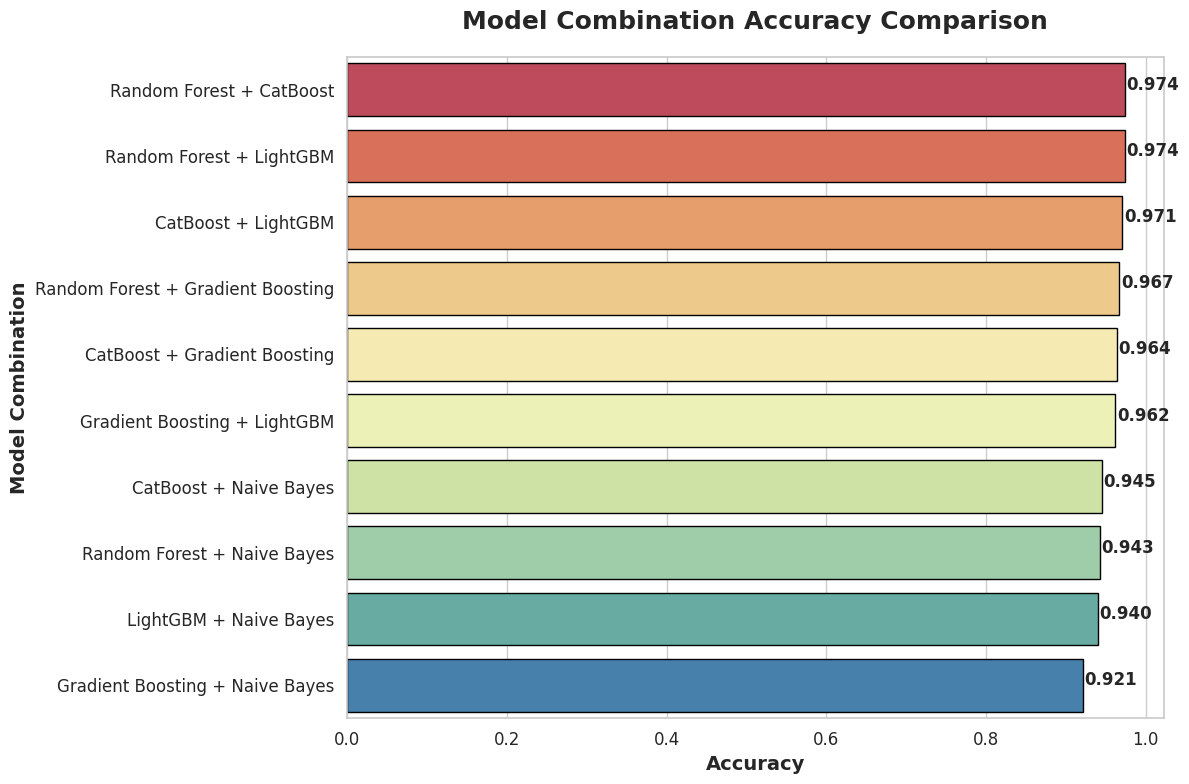

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the models and their accuracies
data = {
    'Model Combination': [
        'Random Forest + CatBoost',
        'Random Forest + Gradient Boosting',
        'Random Forest + LightGBM',
        'Random Forest + Naive Bayes',
        'CatBoost + Gradient Boosting',
        'CatBoost + LightGBM',
        'CatBoost + Naive Bayes',
        'Gradient Boosting + LightGBM',
        'Gradient Boosting + Naive Bayes',
        'LightGBM + Naive Bayes'
    ],
    'Accuracy': [
        0.974,
        0.967,
        0.974,
        0.943,
        0.964,
        0.971,
        0.945,
        0.962,
        0.921,
        0.940
    ]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Sort data by Accuracy for better visualization
df = df.sort_values('Accuracy', ascending=False)

# Set the style and color palette for the plot
sns.set(style="whitegrid")
palette = sns.color_palette("Spectral", len(df))

# Create a barplot with flipped axes
plt.figure(figsize=(12, 8))
sns.barplot(y='Model Combination', x='Accuracy', data=df, palette=palette, edgecolor='black')

# Set title and labels
plt.title('Model Combination Accuracy Comparison', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Model Combination', fontsize=14, fontweight='bold')

# Add accuracy values on the bars
for index, value in enumerate(df['Accuracy']):
    plt.text(value + 0.002, index, f'{value:.3f}', fontsize=12, fontweight='bold')

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a tight layout to ensure nothing is cut off
plt.tight_layout()

# Display the plot
plt.show()